In [1]:
!pip install openai pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai
from google.colab import files
import zipfile
import os
import glob

In [2]:
print("Upload your ZIP file containing CSV/Excel files...")
uploaded = files.upload()

zip_file = list(uploaded.keys())[0]

Upload your ZIP file containing CSV/Excel files...


Saving archive.zip to archive.zip


In [3]:
extract_path = '/content/data'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
print(" Extracted files:")
print(os.listdir(extract_path))

 Extracted files:
['car_sales_data.csv']


In [5]:
csv_files = glob.glob(os.path.join(extract_path, "*.csv"))
excel_files = glob.glob(os.path.join(extract_path, "*.xlsx"))

print("\nCSV files found:", csv_files)
print("Excel files found:", excel_files)


CSV files found: ['/content/data/car_sales_data.csv']
Excel files found: []


In [6]:
if csv_files:
    df = pd.read_csv(csv_files[0])
    print("\nLoaded CSV file:", csv_files[0])
elif excel_files:
    df = pd.read_excel(excel_files[0])
    print("\nLoaded Excel file:", excel_files[0])
else:
    raise Exception("No CSV or Excel files found in the ZIP.")


Loaded CSV file: /content/data/car_sales_data.csv


In [7]:
print("\n📊 Data Preview:")
display(df.head())


📊 Data Preview:


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [8]:
print("\n📈 Data Summary:")
summary = df.describe(include='all')
display(summary)


📈 Data Summary:


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
count,50000,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,5,15,NaN,3,NaN,NaN,NaN
top,Ford,Mondeo,NaN,Petrol,NaN,NaN,NaN
freq,14959,5058,NaN,25488,NaN,NaN,NaN
mean,NaN,NaN,1.773058,NaN,2004.209440,112497.320700,13828.903160
std,NaN,NaN,0.734108,NaN,9.645965,71632.515602,16416.681336
min,NaN,NaN,1.000000,NaN,1984.000000,630.000000,76.000000
25%,NaN,NaN,1.400000,NaN,1996.000000,54352.250000,3060.750000
50%,NaN,NaN,1.600000,NaN,2004.000000,100987.500000,7971.500000
75%,NaN,NaN,2.000000,NaN,2012.000000,158601.000000,19026.500000


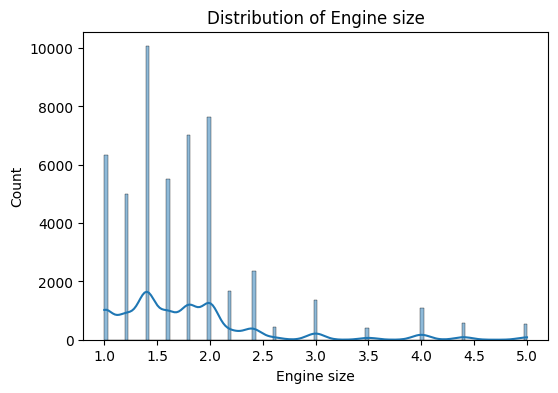

In [9]:
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(6,4))
    sns.histplot(df[numeric_cols[0]], kde=True)
    plt.title(f"Distribution of {numeric_cols[0]}")
    plt.show()
else:
    print("⚠️ No numeric columns found for plotting.")

In [1]:
!pip install openai==0.28.0